In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stock_price = pd.read_csv('AAPL.csv')
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [2]:
stock_price.shape

(2011, 7)

In [3]:
stock_price.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
stock_price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:

stock_price_preprocessed = stock_price.drop_duplicates(subset=['Date'], keep='first')

stock_price_preprocessed.shape#There are noo duplicates or null values in the dataset

(2011, 7)

In [6]:
stock_price_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [7]:
#Type casting date column from Object to datetime
stock_price_preprocessed['Date'] = pd.to_datetime(stock_price_preprocessed['Date'], format="%Y-%m-%d") #changing the datatype of the date column
##from object to datetime
stock_price_preprocessed.info() #cross checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [8]:
stock_price_preprocessed.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2011,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,2016-01-01 03:10:28.344107520,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
min,2012-01-03 00:00:00,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,2014-01-02 12:00:00,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,2015-12-31 00:00:00,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,2017-12-28 12:00:00,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,2019-12-30 00:00:00,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08
std,NaN,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07


In [9]:
corelation = stock_price_preprocessed.corr(numeric_only=True)
corelation
##There is high corelation between open and Adj close
##negative relation between volume and other colunms

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


# Identifying Outliers

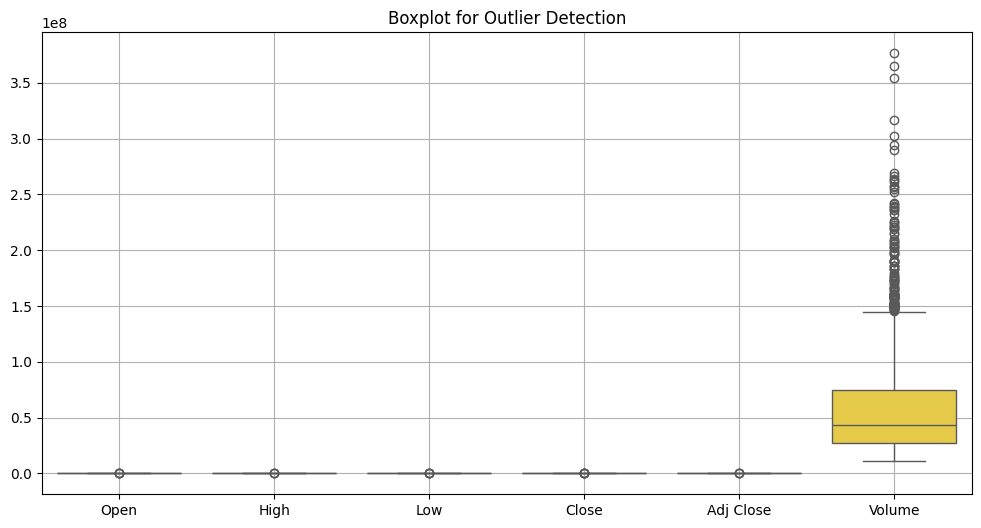

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=stock_price_preprocessed[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], palette='Set2')
plt.title('Boxplot for Outlier Detection')
plt.grid()
plt.show()
#The volume column has a lot of outliers. So the column is being dropped for model building

In [11]:
stock_price_preprocessed = stock_price_preprocessed.drop('Volume',axis=1)
#the Volume column contains a high number of extreme outliers, which could negatively impact model performance and also its not required in our prediction

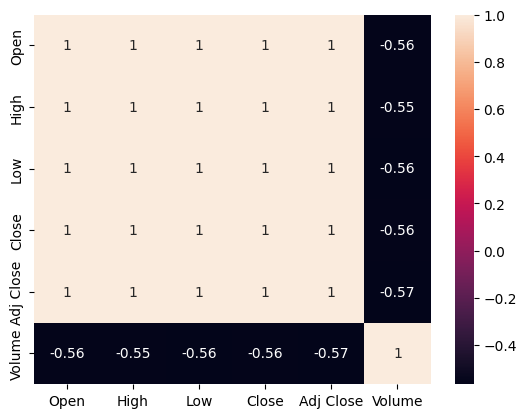

In [12]:
sns.heatmap(corelation,annot=True)
plt.show()

# **visualazation**

In [13]:
import warnings
warnings.filterwarnings("ignore")

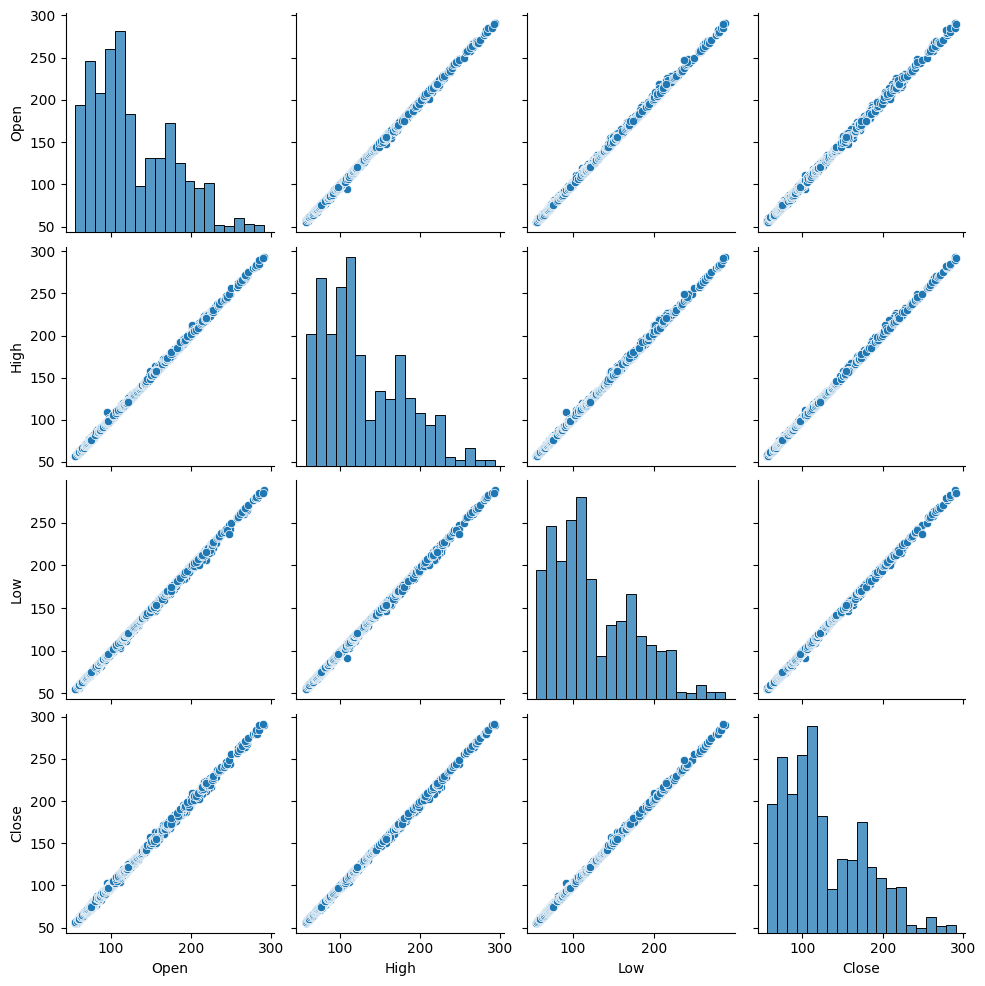

In [14]:
sns.pairplot(stock_price_preprocessed[['Open', 'High', 'Low', 'Close']])
plt.show()
#The Open, High, Low, and Close prices likely show strong positive correlations with each other.

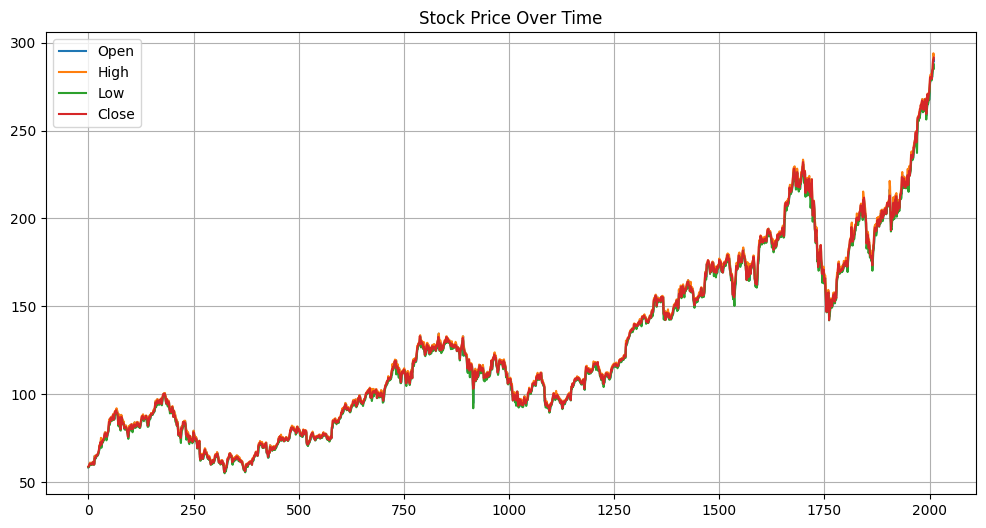

In [15]:
# Plot the stock prices (Open, High, Low, Close) over time
stock_price_preprocessed[['Open', 'High', 'Low', 'Close']].plot(figsize=(12,6), title="Stock Price Over Time")
plt.grid(True)
plt.show()

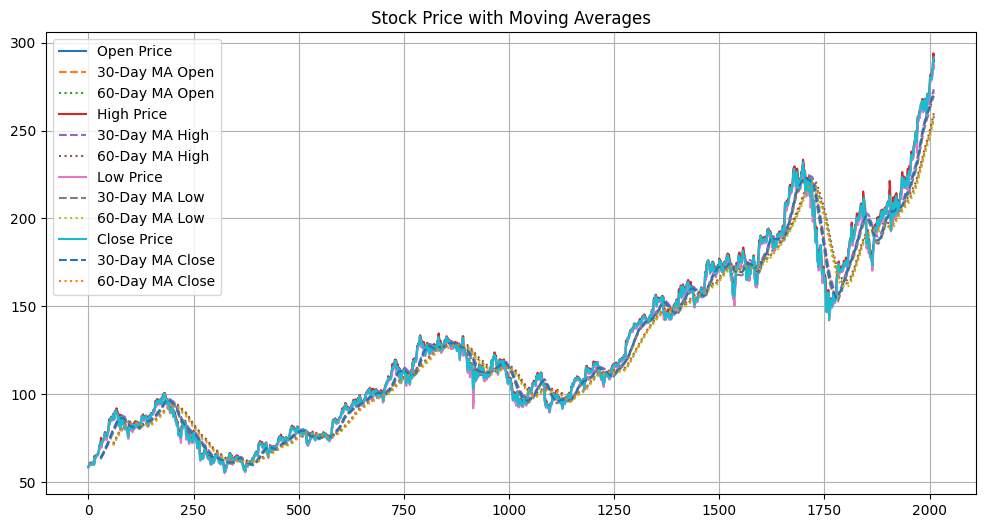

In [16]:
# Moving Averages for Open, High, Low, Close
for col in ['Open', 'High', 'Low', 'Close']:
    stock_price_preprocessed[f'{col}_30MA'] = stock_price_preprocessed[col].rolling(window=30).mean()
    stock_price_preprocessed[f'{col}_60MA'] = stock_price_preprocessed[col].rolling(window=60).mean()

plt.figure(figsize=(12,6))
for col in ['Open', 'High', 'Low', 'Close']:
    plt.plot(stock_price_preprocessed[col], label=f'{col} Price')
    plt.plot(stock_price_preprocessed[f'{col}_30MA'], label=f'30-Day MA {col}', linestyle='dashed')
    plt.plot(stock_price_preprocessed[f'{col}_60MA'], label=f'60-Day MA {col}', linestyle='dotted')
plt.legend()
plt.grid(True)
plt.title("Stock Price with Moving Averages")
plt.show()
##The 30-day one is more sensitive to recent changes, while the 60-day average gives a smoother long-term trend.

In [17]:
stock_price_preprocessed.head()

,Date,Open,High,Low,Close,Adj Close,Open_30MA,Open_60MA,High_30MA,High_60MA,Low_30MA,Low_60MA,Close_30MA,Close_60MA
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**MODELS**

In [33]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on each column separately
for col in ['Open', 'High', 'Low', 'Close']:
    result = adfuller(stock_price_preprocessed[col].dropna())  # Drop NaN values before passing

    print(f"ADF Test for {col}:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print(f"Lags Used: {result[2]}")
    print(f"Number of Observations Used: {result[3]}")
    print(f"Critical Values: {result[4]}\n")

    # Interpretation
    if result[1] <= 0.05:  # p-value
        print(f"{col}: Reject the null hypothesis. The time series is stationary.\n")
    else:
        print(f"{col}: Fail to reject the null hypothesis. The time series is non-stationary.\n")


ADF Test for Open:
ADF Statistic: 1.0603045352246068
p-value: 0.9948631846219326
Lags Used: 13
Number of Observations Used: 1997
Critical Values: {'1%': np.float64(-3.4336287809345873), '5%': np.float64(-2.862988387691722), '10%': np.float64(-2.5675410598947996)}

Open: Fail to reject the null hypothesis. The time series is non-stationary.

ADF Test for High:
ADF Statistic: 1.6470016573320594
p-value: 0.9979919530840655
Lags Used: 2
Number of Observations Used: 2008
Critical Values: {'1%': np.float64(-3.433610796445261), '5%': np.float64(-2.8629804474582348), '10%': np.float64(-2.5675368321236967)}

High: Fail to reject the null hypothesis. The time series is non-stationary.

ADF Test for Low:
ADF Statistic: 1.3102601358897779
p-value: 0.996665769774778
Lags Used: 2
Number of Observations Used: 2008
Critical Values: {'1%': np.float64(-3.433610796445261), '5%': np.float64(-2.8629804474582348), '10%': np.float64(-2.5675368321236967)}

Low: Fail to reject the null hypothesis. The time ser

In [34]:
# Differencing for stationarity as timeseries is non-stationary
stock_price_preprocessed_diff = stock_price_preprocessed[['Open', 'High', 'Low', 'Close']].diff().dropna()

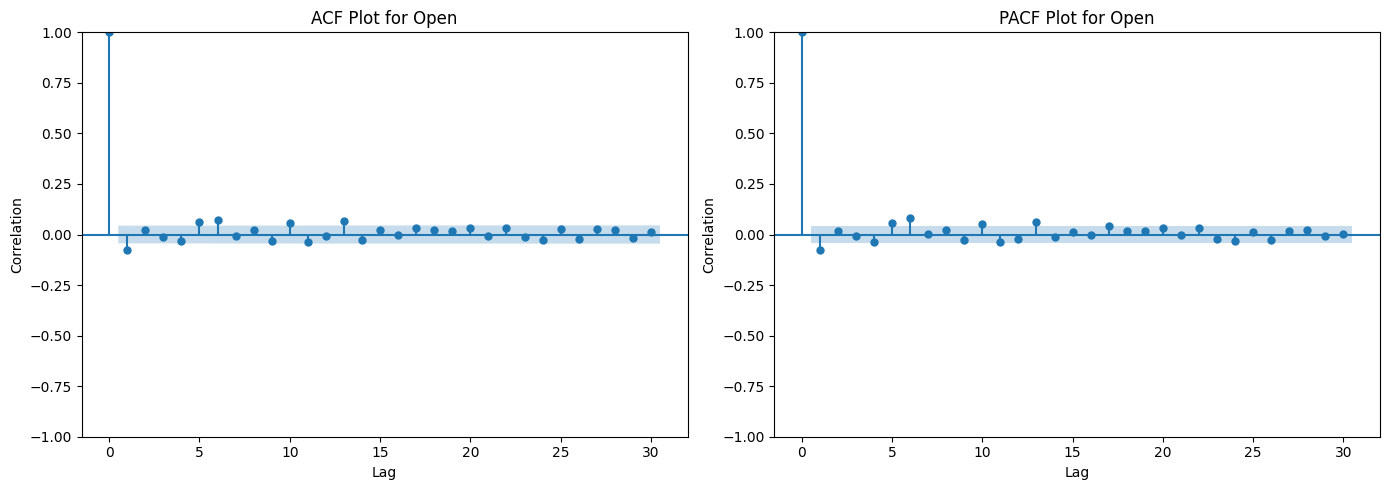

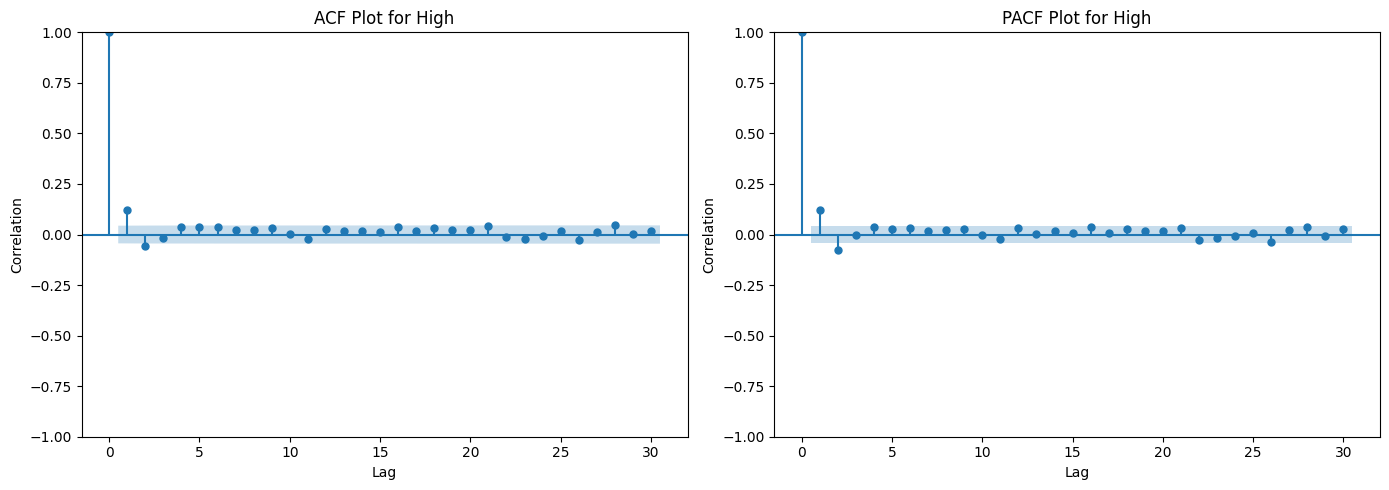

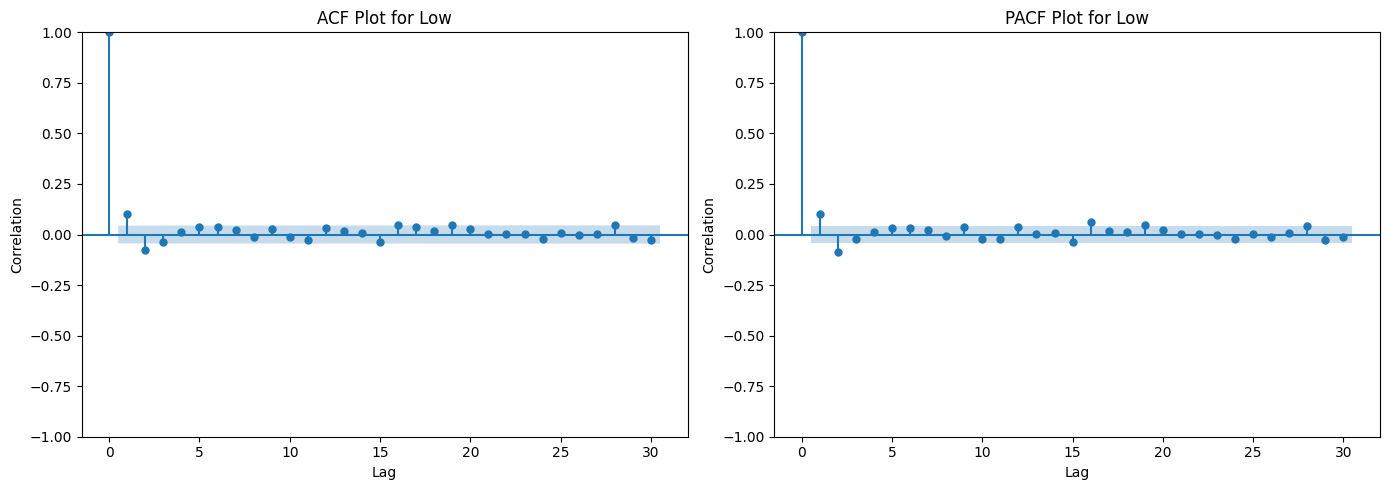

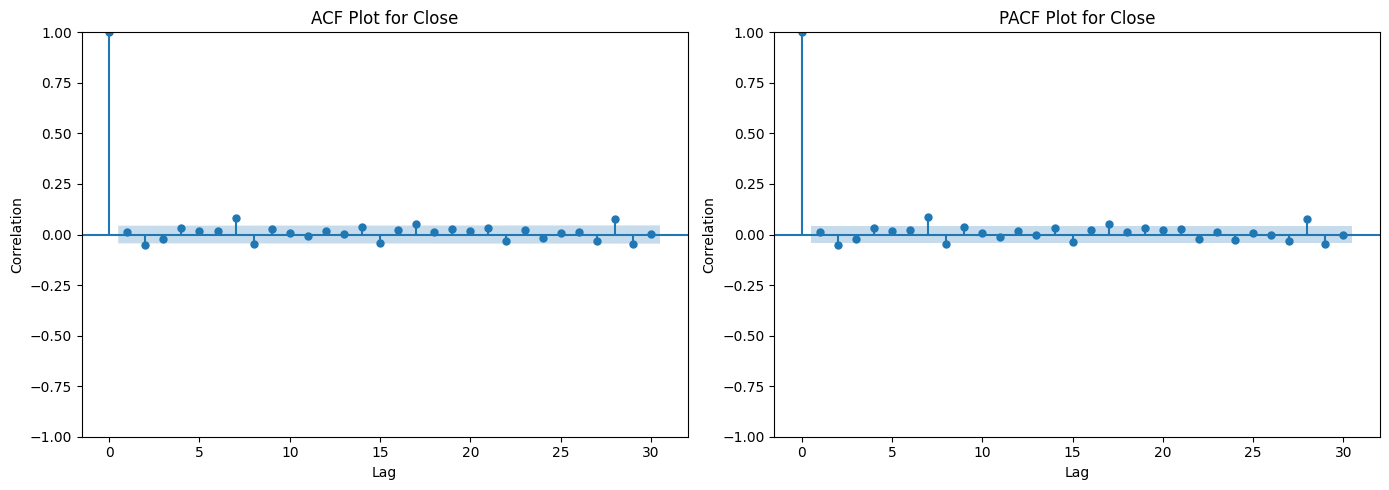

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Loop through each column and plot ACF & PACF as subplots
for col in ['Open', 'High', 'Low', 'Close']:
    fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns for ACF & PACF

    # ACF plot
    plot_acf(stock_price_preprocessed_diff[col].dropna(), lags=30, ax=axes[0])
    axes[0].set_title(f'ACF Plot for {col}')
    axes[0].set_xlabel('Lag')
    axes[0].set_ylabel('Correlation')

    # PACF plot
    plot_pacf(stock_price_preprocessed_diff[col].dropna(), lags=30, method='ywm', ax=axes[1])
    axes[1].set_title(f'PACF Plot for {col}')
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('Correlation')

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()


In [36]:
# Run ADF test on each column separately
for col in ['Open', 'High', 'Low', 'Close']:
    result = adfuller(stock_price_preprocessed[col].diff().dropna())  # Drop NaN values before passing

    print(f"ADF Test for {col}:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print(f"Lags Used: {result[2]}")
    print(f"Number of Observations Used: {result[3]}")
    print(f"Critical Values: {result[4]}\n")

    # Interpretation
    if result[1] <= 0.05:  # p-value
        print(f"{col}: Reject the null hypothesis. The time series is stationary.\n")
    else:
        print(f"{col}: Fail to reject the null hypothesis. The time series is non-stationary.\n")


ADF Test for Open:
ADF Statistic: -11.052305096059978
p-value: 5.0442570722211605e-20
Lags Used: 12
Number of Observations Used: 1997
Critical Values: {'1%': np.float64(-3.4336287809345873), '5%': np.float64(-2.862988387691722), '10%': np.float64(-2.5675410598947996)}

Open: Reject the null hypothesis. The time series is stationary.

ADF Test for High:
ADF Statistic: -31.974317191779296
p-value: 0.0
Lags Used: 1
Number of Observations Used: 2008
Critical Values: {'1%': np.float64(-3.433610796445261), '5%': np.float64(-2.8629804474582348), '10%': np.float64(-2.5675368321236967)}

High: Reject the null hypothesis. The time series is stationary.

ADF Test for Low:
ADF Statistic: -32.698988990262805
p-value: 0.0
Lags Used: 1
Number of Observations Used: 2008
Critical Values: {'1%': np.float64(-3.433610796445261), '5%': np.float64(-2.8629804474582348), '10%': np.float64(-2.5675368321236967)}

Low: Reject the null hypothesis. The time series is stationary.

ADF Test for Close:
ADF Statistic:

In [37]:
training_data = stock_price_preprocessed[(stock_price_preprocessed['Date']<'2018-12-31')]
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Open_30MA,Open_60MA,High_30MA,High_60MA,Low_30MA,Low_60MA,Close_30MA,Close_60MA
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
testing_data = stock_price_preprocessed[(stock_price_preprocessed['Date']>'2018-12-31')]
testing_data.head()

,Date,Open,High,Low,Close,Adj Close,Open_30MA,Open_60MA,High_30MA,High_60MA,Low_30MA,Low_60MA,Close_30MA,Close_60MA
1760,2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,169.782666,191.571500,171.869334,193.937834,166.652334,188.241500,169.078334,190.963000
1761,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,168.231999,190.171833,170.227668,192.559667,165.070334,186.931833,167.367001,189.594667
1762,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,166.716333,188.877167,168.822668,191.288834,163.697334,185.658500,166.113667,188.336167
1763,2019-01-07,148.699997,148.830002,145.899994,147.929993,144.741714,165.727333,187.628166,167.734668,189.981500,162.710334,184.386000,165.145334,187.020500
1764,2019-01-08,149.559998,151.820007,148.520004,150.750000,147.500916,164.721666,186.363166,166.786335,188.739334,161.776000,183.260500,164.277667,185.927000


Training ARIMA for Open
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1759
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3728.895
Date:                Mon, 17 Feb 2025   AIC                           7471.791
Time:                        16:08:00   BIC                           7510.094
Sample:                             0   HQIC                          7485.947
                               - 1759                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0724      0.204     -0.355      0.722      -0.472       0.327
ar.L2         -0.8237      0.080    -10.312      0.000      -0.980      -0.667
ar.L3          0.0622      0

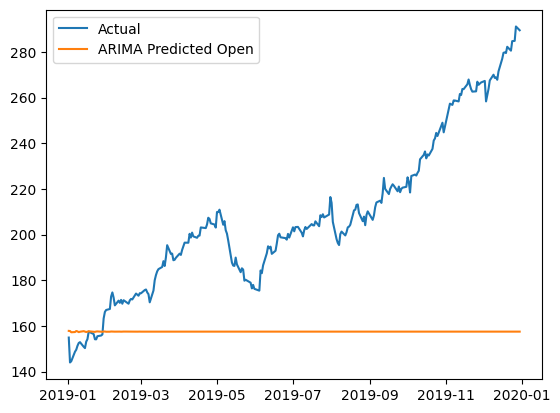

Training ARIMA for High
                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 1759
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3320.555
Date:                Mon, 17 Feb 2025   AIC                           6655.109
Time:                        16:08:01   BIC                           6693.413
Sample:                             0   HQIC                          6669.266
                               - 1759                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0562      0.423      2.496      0.013       0.227       1.886
ar.L2         -0.2813      0.313     -0.898      0.369      -0.895       0.333
ar.L3          0.1764      0

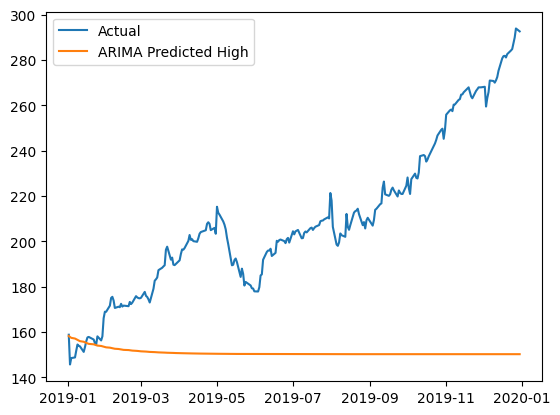

Training ARIMA for Low
                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 1759
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3549.795
Date:                Mon, 17 Feb 2025   AIC                           7113.589
Time:                        16:08:02   BIC                           7151.893
Sample:                             0   HQIC                          7127.745
                               - 1759                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8691      0.096      9.027      0.000       0.680       1.058
ar.L2         -0.5495      0.116     -4.755      0.000      -0.776      -0.323
ar.L3         -0.3421      0.

C:\Users\samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


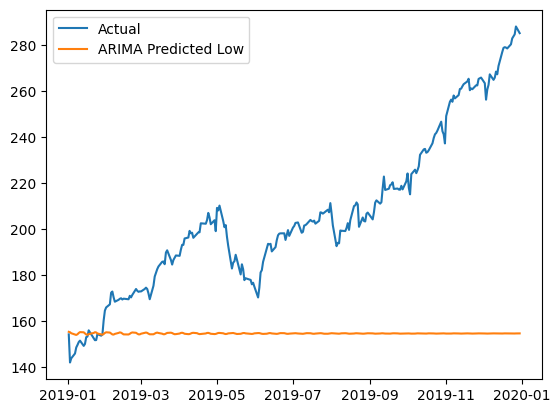

Training ARIMA for Close
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1759
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3627.250
Date:                Mon, 17 Feb 2025   AIC                           7268.500
Time:                        16:08:04   BIC                           7306.803
Sample:                             0   HQIC                          7282.656
                               - 1759                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2459      0.018    -13.941      0.000      -0.281      -0.211
ar.L2         -0.2676      0.014    -19.150      0.000      -0.295      -0.240
ar.L3         -0.9821      

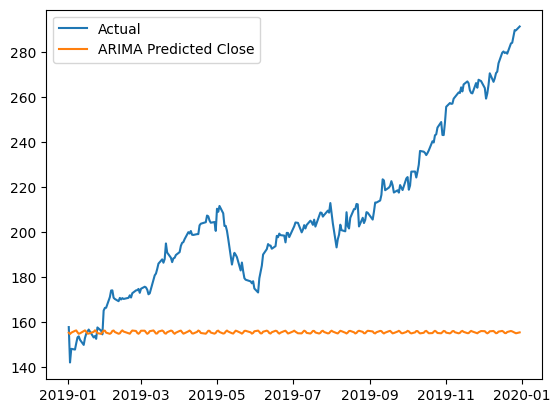

In [39]:
from statsmodels.tsa.arima.model import ARIMA
# arima_results = {}
# for col in ['Open', 'High', 'Low', 'Close']:
#     model = ARIMA(training_data[col], order=(3,1,2))
#     result = model.fit()
#     arima_results[col] = result
#     print(result.summary())
#     test_pred = arima_results[col].forecast(steps=len(testing_data))
#     plt.plot(testing_data.index, testing_data[col], label='Actual')
#     plt.plot(testing_data.index, test_pred, label=f'ARIMA Predicted {col}')
#     plt.legend()
#     plt.show()

def train_arima(series, order=(3,1,3)):
    model = ARIMA(series, order=order)
    result = model.fit()
    print(result.summary())
    return result

arima_results = {}
for col in ['Open', 'High', 'Low', 'Close']:
    print(f"Training ARIMA for {col}")
    arima_results[col] = train_arima(training_data[col])
    test_pred = arima_results[col].forecast(steps=len(testing_data))
    plt.plot(testing_data['Date'], testing_data[col], label='Actual')
    plt.plot(testing_data['Date'], test_pred, label=f'ARIMA Predicted {col}')
    plt.legend()
    plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [42]:
# Selecting the 'Close' price for prediction
data = stock_price_preprocessed[['Close']].values# Convert to NumPy array

In [43]:
# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [44]:
# Create sequences (X: past 60 days, Y: next day prediction)
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])   # Past 60 days
        y.append(data[i + time_step])     # Next day's Close price
    return np.array(X), np.array(y)

In [46]:
import numpy as np
# Define time step (past 60 days)
time_step = 60
X, y = create_sequences(scaled_data, time_step)

In [47]:
# Split into training (80%) and testing (20%)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [48]:
# Reshape for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [49]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer (next day's Close price)
])

In [50]:
# Compile Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [51]:
# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0133 - val_loss: 0.0016
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.7073e-04 - val_loss: 0.0012
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.6205e-04 - val_loss: 0.0010
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.4939e-04 - val_loss: 0.0011
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.3814e-04 - val_loss: 0.0012
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.5750e-04 - val_loss: 0.0013
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.2527e-04 - val_loss: 9.5980e-04
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.3948e-04 - val_loss: 0.0011
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7953e-04 - val_loss: 0.0010
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3338e-04 - val_loss: 9.8586e-04
Epoch 12/20
49/49 ━

In [52]:
# Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [53]:
# Convert y_test back to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [54]:
# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 9.353532873683612


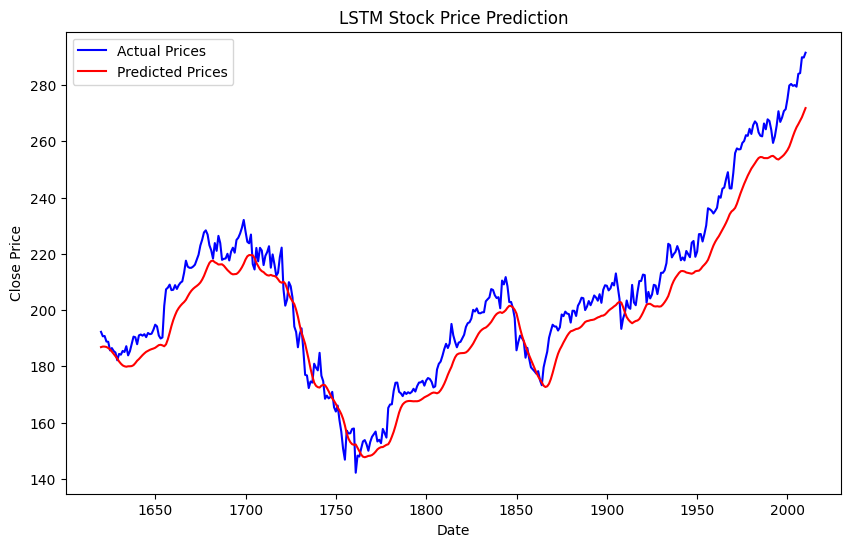

In [56]:
# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.plot(stock_price_preprocessed.index[-len(y_test_actual):], y_test_actual, label="Actual Prices", color="blue")
plt.plot(stock_price_preprocessed.index[-len(predicted_prices):], predicted_prices, label="Predicted Prices", color="red")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("LSTM Stock Price Prediction")
plt.legend()
plt.show()